In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)


import altair as alt
alt.data_transformers.disable_max_rows()

import glob
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import act
import pyart
import xarray as xr
import os



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



ImportError: cannot import name 'HybridMappingProxy' from 'xarray.core.utils' (/Users/elischwat/miniforge3/envs/sublimationofsnow/lib/python3.12/site-packages/xarray/core/utils.py)

In [2]:
username = os.getenv("ARM_USERNAME")
token = os.getenv("ARM_TOKEN")

# Identify datastreams

In [3]:
# ppi:  Single-pass full-360o plan position indicator scan 
# ppi2: Single- or multi-pass full or limited sector plan position indicator scan 
# rhi:  Single-pass full-180o range height indicator scan 
# rhi2: Single- or multi-pass full or limited sector range height indicator scan
ds_dl_ppi = 'gucdlppiM1.b1'
ds_dl_rhi = 'gucdlrhiM1.b1'
ds_dl_rhi2 = 'gucdlrhi2M1.b1'

startdate = '2022-10-30'
enddate = '2022-11-04'

# Download datasets

In [5]:
act.discovery.download_arm_data(username, token, 'dlprofwind4news', startdate, enddate)

No files returned or url status error.
Check datastream name, start, and end date.


[]

In [6]:
act.discovery.download_arm_data(username, token, ds_dl_ppi, startdate, enddate)
act.discovery.download_arm_data(username, token, ds_dl_rhi, startdate, enddate)
act.discovery.download_arm_data(username, token, ds_dl_rhi2, startdate, enddate)

[DOWNLOADING] gucdlppiM1.b1.20221102.060022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.124502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221102.004503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221030.183002.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.071502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.233003.cdf
[DOWNLOADING] gucdlppiM1.b1.20221101.023002.cdf
[DOWNLOADING] gucdlppiM1.b1.20221101.020022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221102.224502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.183003.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.093002.cdf
[DOWNLOADING] gucdlppiM1.b1.20221102.070022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221101.064502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221030.053002.cdf
[DOWNLOADING] gucdlppiM1.b1.20221101.191503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221101.210021.cdf
[DOWNLOADING] gucdlppiM1.b1.20221101.153003.cdf
[DOWNLOADING] gucdlppiM1.b1.20221102.131502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221101.151503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.010022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.073

[]

In [7]:
startdate1 = '2022-10-30'
enddate1 = '2022-11-01'
startdate2 = '2022-11-02'
enddate2 = '2022-11-04'
act.discovery.download_arm_data(username, token, ds_dl_ppi, startdate1, enddate1)
act.discovery.download_arm_data(username, token, ds_dl_rhi, startdate1, enddate1)
act.discovery.download_arm_data(username, token, ds_dl_rhi2, startdate1, enddate1)

[DOWNLOADING] gucdlppiM1.b1.20221031.124502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221030.183002.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.071502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.233003.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.183003.cdf
[DOWNLOADING] gucdlppiM1.b1.20221030.053002.cdf
[DOWNLOADING] gucdlppiM1.b1.20221030.174502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.050022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.040022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221030.003002.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.073003.cdf
[DOWNLOADING] gucdlppiM1.b1.20221030.191502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.194503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221030.094503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221030.124503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221030.000022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221030.104502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.151503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.070022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221030.221502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221031.190

[]

In [8]:
act.discovery.download_arm_data(username, token, ds_dl_ppi, startdate2, enddate2)
act.discovery.download_arm_data(username, token, ds_dl_rhi, startdate2, enddate2)
act.discovery.download_arm_data(username, token, ds_dl_rhi2, startdate2, enddate2)

[DOWNLOADING] gucdlppiM1.b1.20221102.060022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221102.004503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221102.224502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.093002.cdf
[DOWNLOADING] gucdlppiM1.b1.20221102.070022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221102.131502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.010022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.073003.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.110021.cdf
[DOWNLOADING] gucdlppiM1.b1.20221102.204502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.204503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221102.034502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.060022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.061502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221102.023002.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.221502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.220021.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.114503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221102.073002.cdf
[DOWNLOADING] gucdlppiM1.b1.20221102.141503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221103.171

[]

In [9]:
# dl_ppi_files = glob.glob('gudlppiM1.b1')
# dl_rhi_files = glob.glob('gucdlrhiM1.b1')

dl_ppi_files = glob.glob(''.join(['./',ds_dl_ppi,'/*cdf']))
dl_rhi_files = glob.glob(''.join(['./',ds_dl_rhi,'/*cdf']))
dl_rhi2_files = glob.glob(''.join(['./',ds_dl_rhi2,'/*cdf']))

In [11]:
dl_rhi = act.io.read_arm_netcdf(dl_rhi_files)

In [12]:
dl_ppi = act.io.read_arm_netcdf(dl_ppi_files)


# Examine RHI data

In [13]:
src_rhi = dl_rhi.to_dataframe().reset_index()

# Convert time zone

In [14]:
src_rhi['time'] = src_rhi['time'] - datetime.timedelta(hours = 6)

In [15]:
(
    len(src_rhi['time'].unique()), 
    len(src_rhi['range'].unique()), 
    len(src_rhi['elevation'].unique()), 
    len(src_rhi['azimuth'].unique())
)

(43561, 400, 14224, 2)

In [16]:
(
    # len(src_rhi['elevation'].unique()), 
    len(src_rhi['azimuth'].unique())
)

2

43561 timestamps over multiple days  (based on our query)

400 discrete range values

13866 discrete elevation angles

2 azimuth directions (0, 270)

In [17]:
(
    src_rhi['time'].unique(), 
    src_rhi['range'].unique(), 
    src_rhi['elevation'].unique(), 
    src_rhi['azimuth'].unique()
)

(<DatetimeArray>
 ['2022-10-29 18:01:18.699996', '2022-10-29 18:01:19.869997',
  '2022-10-29 18:01:20.889987', '2022-10-29 18:01:21.910007',
  '2022-10-29 18:01:22.959987', '2022-10-29 18:01:23.980014',
  '2022-10-29 18:01:25.039995', '2022-10-29 18:01:26.060012',
  '2022-10-29 18:01:27.080003', '2022-10-29 18:01:28.099994',
  ...
  '2022-11-03 17:07:28.626708', '2022-11-03 17:07:29.677276',
  '2022-11-03 17:07:30.700378', '2022-11-03 17:07:31.709747',
  '2022-11-03 17:07:32.719116', '2022-11-03 17:07:33.742218',
  '2022-11-03 17:07:34.758453', '2022-11-03 17:07:35.781555',
  '2022-11-03 17:07:36.790924', '2022-11-03 17:07:37.930755']
 Length: 43561, dtype: datetime64[ns],
 array([   15.,    45.,    75.,   105.,   135.,   165.,   195.,   225.,
          255.,   285.,   315.,   345.,   375.,   405.,   435.,   465.,
          495.,   525.,   555.,   585.,   615.,   645.,   675.,   705.,
          735.,   765.,   795.,   825.,   855.,   885.,   915.,   945.,
          975.,  1005.,  1035.

## RHI: convert polar coordinates to rectangular coords with the radar at (0,0)

In [18]:
src_rhi['x'] = src_rhi['range']*np.cos(np.deg2rad(src_rhi['elevation']))
src_rhi['z'] = src_rhi['range']*np.sin(np.deg2rad(src_rhi['elevation']))

## Plot hourly RHI scans (azimuth == 0)

In [19]:
src_rhi['date'] = src_rhi['time'].dt.date

In [20]:
src_rhi['date'].min(), src_rhi['date'].max()

(datetime.date(2022, 10, 29), datetime.date(2022, 11, 3))

In [21]:
src_rhi.query('range==15').query('qc_time==0').head(400)

time  range  base_time  \
400    2022-10-29 18:01:19.869997   15.0 2022-10-30   
800    2022-10-29 18:01:20.889987   15.0 2022-10-30   
1200   2022-10-29 18:01:21.910007   15.0 2022-10-30   
1600   2022-10-29 18:01:22.959987   15.0 2022-10-30   
2000   2022-10-29 18:01:23.980014   15.0 2022-10-30   
2400   2022-10-29 18:01:25.039995   15.0 2022-10-30   
2800   2022-10-29 18:01:26.060012   15.0 2022-10-30   
3200   2022-10-29 18:01:27.080003   15.0 2022-10-30   
3600   2022-10-29 18:01:28.099994   15.0 2022-10-30   
4000   2022-10-29 18:01:29.129983   15.0 2022-10-30   
4400   2022-10-29 18:01:30.140003   15.0 2022-10-30   
4800   2022-10-29 18:01:31.159988   15.0 2022-10-30   
5200   2022-10-29 18:01:32.180015   15.0 2022-10-30   
5600   2022-10-29 18:01:33.189990   15.0 2022-10-30   
6000   2022-10-29 18:01:34.209980   15.0 2022-10-30   
6400   2022-10-29 18:01:35.240020   15.0 2022-10-30   
6800   2022-10-29 18:01:36.260002   15.0 2022-10-30   
7200   2022-10-29 18:01:37.279994   15.0 2022-10-30   
7600   2022-10-29 18:01:38.290008   15.0 2022-10-30   
8000   2022-10-29 18:01:39.309997   15.0 2022-10-30   
8400   2022-10-29 18:01:40.329986   15.0 2022-10-30   
8800   2022-10-29 18:01:41.350006   15.0 2022-10-30   
9200   2022-10-29 18:01:42.369991   15.0 2022-10-30   
9600   2022-10-29 18:01:43.380008   15.0 2022-10-30   
10000  2022-10-29 18:01:44.400001   15.0 2022-10-30   
10400  2022-10-29 18:01:45.419982   15.0 2022-10-30   
10800  2022-10-29 18:01:46.449981   15.0 2022-10-30   
11200  2022-10-29 18:01:47.470008   15.0 2022-10-30   
11600  2022-10-29 18:01:48.489997   15.0 2022-10-30   
12000  2022-10-29 18:01:49.509979   15.0 2022-10-30   
12400  2022-10-29 18:01:50.530006   15.0 2022-10-30   
12800  2022-10-29 18:01:51.560005   15.0 2022-10-30   
13200  2022-10-29 18:01:52.579994   15.0 2022-10-30   
13600  2022-10-29 18:01:53.600013   15.0 2022-10-30   
14000  2022-10-29 18:01:54.620002   15.0 2022-10-30   
14400  2022-10-29 18:01:55.629989   15.0 2022-10-30   
14800  2022-10-29 18:01:56.660011   15.0 2022-10-30   
15200  2022-10-29 18:01:57.770004   15.0 2022-10-30   
15600  2022-10-29 18:01:58.779987   15.0 2022-10-30   
16000  2022-10-29 18:01:59.800006   15.0 2022-10-30   
16400  2022-10-29 18:02:00.819997   15.0 2022-10-30   
16800  2022-10-29 18:02:01.839981   15.0 2022-10-30   
17200  2022-10-29 18:02:02.860007   15.0 2022-10-30   
17600  2022-10-29 18:02:03.879990   15.0 2022-10-30   
18000  2022-10-29 18:02:04.899988   15.0 2022-10-30   
18400  2022-10-29 18:02:05.910000   15.0 2022-10-30   
18800  2022-10-29 18:02:06.929984   15.0 2022-10-30   
19200  2022-10-29 18:02:07.959980   15.0 2022-10-30   
19600  2022-10-29 18:02:08.980007   15.0 2022-10-30   
20000  2022-10-29 18:02:09.989991   15.0 2022-10-30   
20400  2022-10-29 18:02:11.010017   15.0 2022-10-30   
20800  2022-10-29 18:02:12.030000   15.0 2022-10-30   
21200  2022-10-29 18:02:13.040027   15.0 2022-10-30   
21600  2022-10-29 18:02:14.070010   15.0 2022-10-30   
22000  2022-10-29 18:02:15.089993   15.0 2022-10-30   
22400  2022-10-29 18:02:16.109991   15.0 2022-10-30   
22800  2022-10-29 18:02:17.130016   15.0 2022-10-30   
23200  2022-10-29 18:02:18.139987   15.0 2022-10-30   
23600  2022-10-29 18:02:19.160013   15.0 2022-10-30   
24000  2022-10-29 18:02:20.169982   15.0 2022-10-30   
24400  2022-10-29 18:02:21.199993   15.0 2022-10-30   
24800  2022-10-29 18:02:22.210006   15.0 2022-10-30   
25200  2022-10-29 18:02:23.230003   15.0 2022-10-30   
25600  2022-10-29 18:02:24.249973   15.0 2022-10-30   
26000  2022-10-29 18:02:25.270013   15.0 2022-10-30   
26400  2022-10-29 18:02:26.289997   15.0 2022-10-30   
26800  2022-10-29 18:02:27.309993   15.0 2022-10-30   
27200  2022-10-29 18:02:28.320007   15.0 2022-10-30   
27600  2022-10-29 18:02:29.339990   15.0 2022-10-30   
28000  2022-10-29 18:02:30.350002   15.0 2022-10-30   
28400  2022-10-29 18:02:31.380001   15.0 2022-10-30   
28800  2022-10-29 18:02:32.390014   15.0 2022-10-30   
29200  2022-10

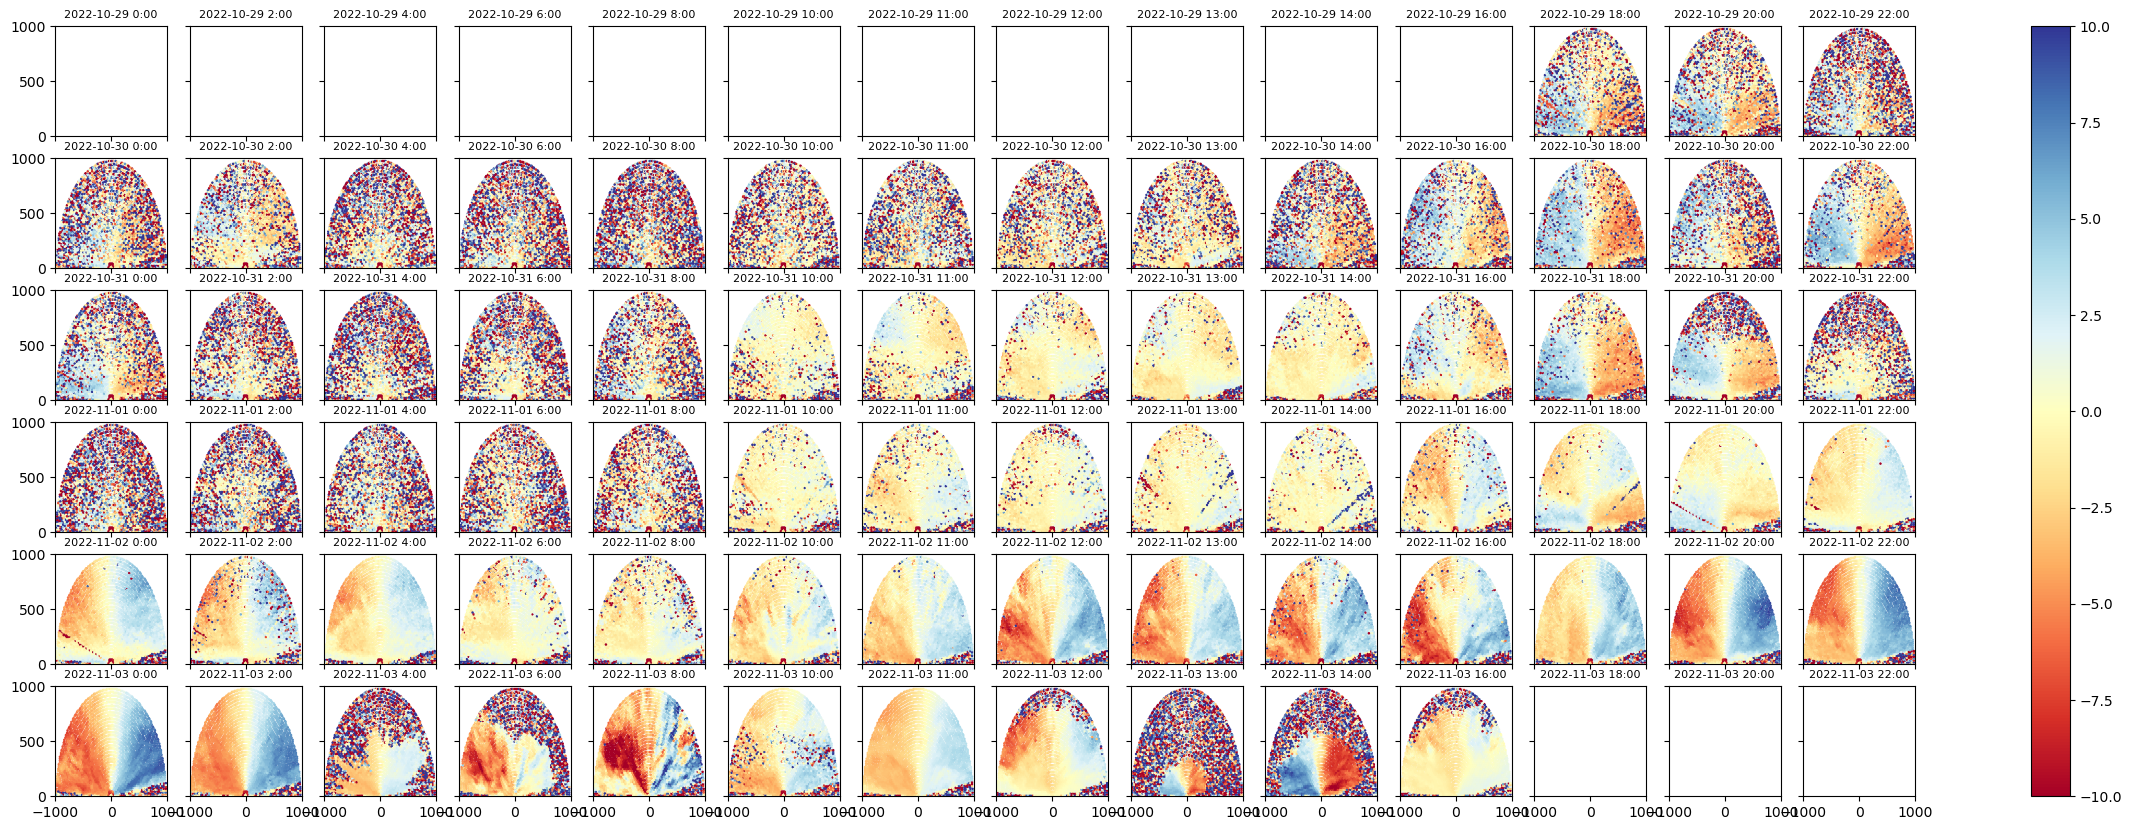

In [22]:
src = src_rhi[src_rhi['azimuth'] == 0].query('range < 1000')
plot_hours = [
    0,2,4,6,8,  10, 11, 12, 13, 14, 16, 18, 20, 22
]
plot_days = list(sorted(src_rhi['date'].unique()))

fig, axes = plt.subplots(
    len(src_rhi['date'].unique()), 
    len(plot_hours), 
    figsize=(30,10), 
    sharex=True, sharey=True
)


for i_day, day in enumerate(plot_days):
    for i,hr in enumerate(plot_hours):
        local_src = src[ (src['date'] == day) & (src['time'].dt.hour == hr)]
        ax = axes[i_day][i]
        hexplot = ax.hexbin(local_src['x'], local_src['z'], C=local_src['radial_velocity'], cmap='RdYlBu', clim=(-10, 10))
        # ax.annotate(f"{day}:00", xy=(-900, 900))
        ax.title.set_text(f"{day} {hr}:00")
        ax.title.set_fontsize(8)
        ax.set_xlim(-1000, 1000)
        ax.set_ylim(0, 1000)
fig.colorbar(hexplot, ax=axes.ravel().tolist())

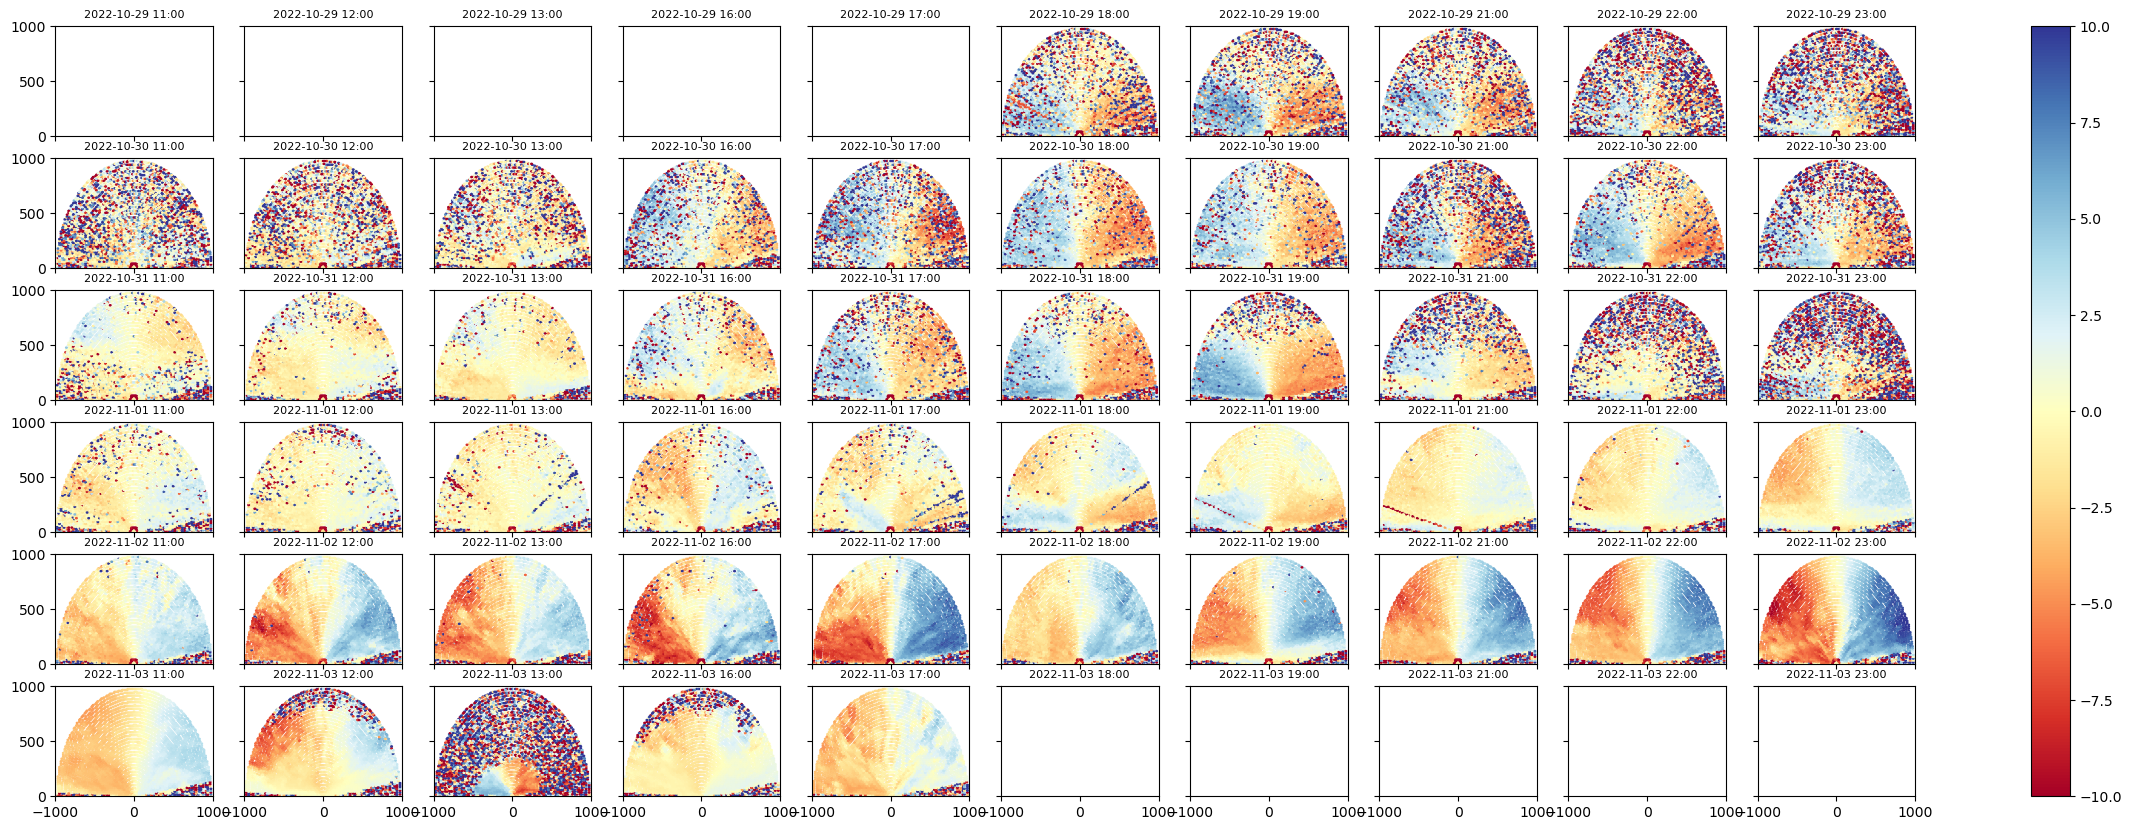

In [23]:
src = src_rhi[src_rhi['azimuth'] == 0].query('range < 1000')
plot_hours = [
    11,12,13,16,17,18,19,21,22,23
]
plot_days = list(sorted(src_rhi['date'].unique()))

fig, axes = plt.subplots(
    len(src_rhi['date'].unique()), 
    len(plot_hours), 
    figsize=(30,10), 
    sharex=True, sharey=True
)


for i_day, day in enumerate(plot_days):
    for i,hr in enumerate(plot_hours):
        local_src = src[ (src['date'] == day) & (src['time'].dt.hour == hr)]
        ax = axes[i_day][i]
        hexplot = ax.hexbin(local_src['x'], local_src['z'], C=local_src['radial_velocity'], cmap='RdYlBu', clim=(-10, 10))
        # ax.annotate(f"{day}:00", xy=(-900, 900))
        ax.title.set_text(f"{day} {hr}:00")
        ax.title.set_fontsize(8)
        ax.set_xlim(-1000, 1000)
        ax.set_ylim(0, 1000)
fig.colorbar(hexplot, ax=axes.ravel().tolist())

In [24]:
import matplotlib
font = {
    # 'family' : 'normal',
    #     'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

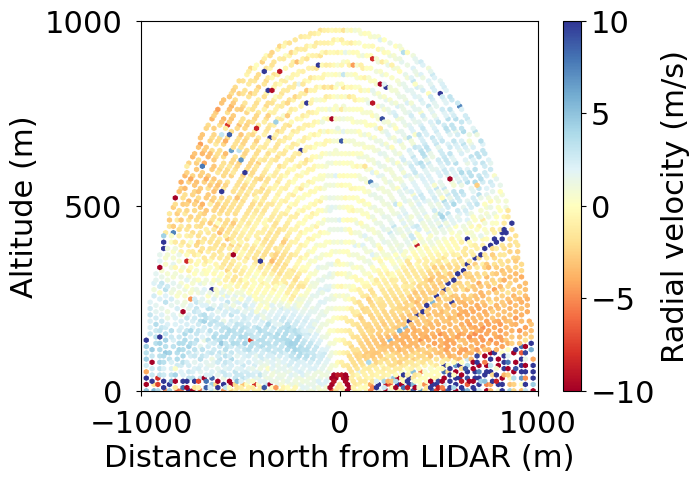

In [25]:
src = src_rhi[src_rhi['azimuth'] == 0].query('range < 1000')
src = src[(src['date'] == datetime.date(2022, 11, 1)) & (src['time'].dt.hour.isin([18]))]

hexplot = plt.hexbin(src['x'], src['z'], C=src['radial_velocity'], cmap='RdYlBu', clim=(-10, 10))
plt.xlim(-1000, 1000)
plt.ylim(0, 1000)
cbar = plt.colorbar()
cbar.set_label('Radial velocity (m/s)')
plt.xticks([-1000,0,1000])
plt.tick_params(direction='out', pad=10)

plt.yticks([0,500,1000])
plt.xlabel("Distance north from LIDAR (m)")
plt.ylabel("Altitude (m)")
assert len(src['date'].unique()) == 1

# plt.title(
#     f"{src['time'].min()} to {src['time'].max()}",
#     y=1.05
# )

## Plot hourly RHI scans (azimuth == 270)

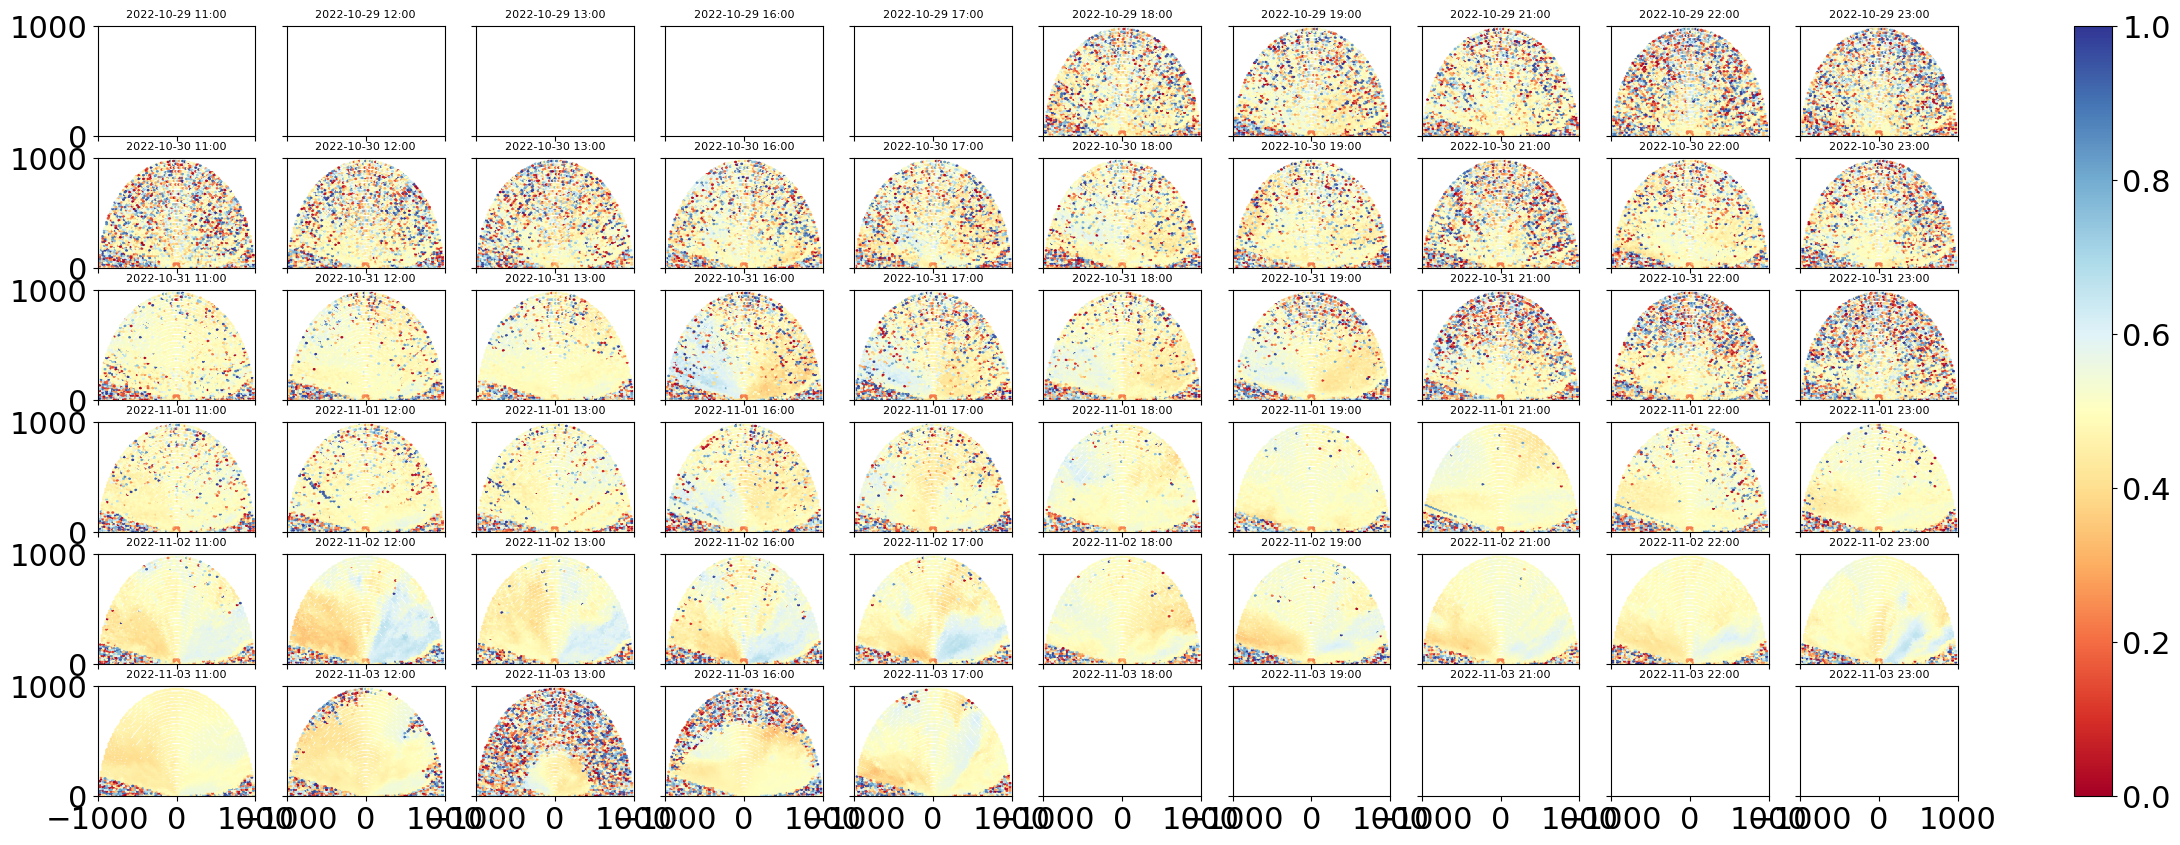

In [26]:
src = src_rhi[src_rhi['azimuth'] == 270].query('range < 1000')
plot_hours = [
    11,12,13,16,17,18,19,21,22,23
]
plot_days = list(sorted(src_rhi['date'].unique()))

fig, axes = plt.subplots(
    len(src_rhi['date'].unique()), 
    len(plot_hours), 
    figsize=(30,10), 
    sharex=True, sharey=True
)


for i_day, day in enumerate(plot_days):
    for i,hr in enumerate(plot_hours):
        local_src = src[ (src['date'] == day) & (src['time'].dt.hour == hr)]
        ax = axes[i_day][i]
        hexplot = ax.hexbin(local_src['x'], local_src['z'], C=local_src['radial_velocity'], cmap='RdYlBu')
        # ax.annotate(f"{day}:00", xy=(-900, 900))
        ax.title.set_text(f"{day} {hr}:00")
        ax.title.set_fontsize(8)
        ax.set_xlim(-1000, 1000)
        ax.set_ylim(0, 1000)
fig.colorbar(hexplot, ax=axes.ravel().tolist())

# Examine PPI data

## By using xarray DIRECTLY

In [27]:
dl_ppi_files[:5], dl_ppi_files[-5:]

(['./gucdlppiM1.b1/gucdlppiM1.b1.20221030.000022.cdf',
  './gucdlppiM1.b1/gucdlppiM1.b1.20221030.001503.cdf',
  './gucdlppiM1.b1/gucdlppiM1.b1.20221030.003002.cdf',
  './gucdlppiM1.b1/gucdlppiM1.b1.20221030.004503.cdf',
  './gucdlppiM1.b1/gucdlppiM1.b1.20221030.010022.cdf'],
 ['./gucdlppiM1.b1/gucdlppiM1.b1.20221103.224503.cdf',
  './gucdlppiM1.b1/gucdlppiM1.b1.20221103.230022.cdf',
  './gucdlppiM1.b1/gucdlppiM1.b1.20221103.231502.cdf',
  './gucdlppiM1.b1/gucdlppiM1.b1.20221103.233002.cdf',
  './gucdlppiM1.b1/gucdlppiM1.b1.20221103.234503.cdf'])

In [29]:
import xarray as xr

In [30]:
df = xr.open_dataset(dl_ppi_files[0]).to_dataframe().reset_index()

In [31]:
dl_ppi.time.max(), dl_ppi.time.min()

(<xarray.DataArray 'time' ()> Size: 8B
 array('2022-11-03T23:45:39.179992000', dtype='datetime64[ns]'),
 <xarray.DataArray 'time' ()> Size: 8B
 array('2022-10-30T00:00:22.240007000', dtype='datetime64[ns]'))

## By using the ACT library to compute vertical wind profiles

In [32]:
len(dl_ppi[dict(range=slice(0, 2))].to_dataframe()), len(dl_ppi.to_dataframe())

(7680, 1536000)

### Limit range values so that computing winds doesn't take so long

In [33]:
dl_ppi_slice = dl_ppi[dict(range=slice(0, 4))].sel(
    time=slice(datetime.datetime(2022,11,2,4), datetime.datetime(2022,11,2,16))
)

In [51]:
dl_ppi_slice.elevation.values
# src_rhi['x'] = src_rhi['range']*np.cos(np.deg2rad(src_rhi['elevation']))
# src_rhi['z'] = src_rhi['range']*np.sin(np.deg2rad(src_rhi['elevation']))

array([70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70

In [34]:
# Calculate the winds from the gucdlppi dataset.
wind_obj_sliced = act.retrievals.compute_winds_from_ppi(
    dl_ppi_slice,
    remove_all_missing=True, 
    snr_threshold=0.002
)

In [35]:
wind_obj_sliced.to_dataframe()

wind_speed  wind_direction  \
time                          height                                  
2022-11-02 04:00:39.880370500 14.095389         NaN             NaN   
                              42.286167    0.571300      158.022276   
                              70.476944    1.410074      328.952547   
                              98.667725    0.772092       65.835178   
2022-11-02 04:15:21.355533000 14.095389         NaN             NaN   
                              42.286167    0.444050      320.878472   
                              70.476944    0.339172       94.093053   
                              98.667725    1.244682      158.186135   
2022-11-02 04:30:20.894622500 14.095389    0.148918       93.026753   
                              42.286167    0.771180      329.581348   
                              70.476944    1.114167        7.709459   
                              98.667725    1.468400       92.104215   
2022-11-02 04:45:21.175231500 14.095389         NaN             NaN   
                              42.286167    0.234241      227.620865   
                              70.476944    2.043304        2.127781   
                              98.667725    0.643830      335.126049   
2022-11-02 05:00:39.715575500 14.095389         NaN             NaN   
                              42.286167    0.485892      249.745577   
                              70.476944    0.529725      312.091675   
                              98.667725    0.861244      334.620033   
2022-11-02 05:15:20.644855000 14.095389    0.136841        4.237138   
                              42.286167    0.255302      137.832401   
                              70.476944    1.777401      151.361486   
                              98.667725    2.513403      147.835594   
2022-11-02 05:30:21.134948500 14.095389    0.022396      124.100091   
                              42.286167         NaN             NaN   
                              70.476944    1.111164      216.065755   
                              98.667725    0.565066      161.957410   
2022-11-02 05:45:21.470489000 14.095389    0.060014      325.391083   
                              42.286167    0.297937      326.250432   
                              70.476944    0.942764       77.229549   
                              98.667725    0.881367      121.126186   
2022-11-02 06:00:40.395354500 14.095389    0.077833      244.587096   
                              42.286167    0.142842       67.031799   
                              70.476944    1.025313       79.368897   
                              98.667725    0.911469      103.845416   
2022-11-02 06:15:21.180438500 14.095389         NaN             NaN   
                              42.286167    0.427246      124.544265   
                              70.476944    1.312228      336.959146   
                              98.667725    0.580767      177.684426   
2022-11-02 06:30:21.460246500 14.095389         NaN             NaN   
                              42.286167    0.228498      331.036927   
                              70.476944    1.701947      339.470393   
                              98.667725    1.532268      343.976510   
2022-11-02 06:45:21.474837500 14.095389    0.061434      295.359242   
                              42.286167    6.724125      350.487297   
                              70.476944    1.381475      355.557893   
                              98.667725    1.077597      344.641617   
2022-11-02 07:00:39.974784500 14.095389         NaN             NaN   
                              42.286167    0.292664      287.457324   
                              70.476944    0.523585       11.596946   
                              98.667725    0.915506      353.412018   
2022-11-02 07:15:20.989894000 14.095389         NaN             NaN   
                              42.286167    0.321333      155.863966   
                              70.476944    0.504885      357.0992

In [36]:
alt.Chart(
    wind_obj_sliced.to_dataframe().reset_index()
).mark_point(shape="wedge", filled=True).encode(
    alt.X('time:T'),
    alt.Y('height:Q'),
    # color=alt.Color(
    #     "wind direction", scale=alt.Scale(domain=[0, 360], scheme="rainbow"), legend=None
    # ),
    angle=alt.Angle("wind_direction", scale=alt.Scale(domain=[0, 360], range=[180, 540])),
    size=alt.Size("wind_speed", scale=alt.Scale(rangeMax=2000, rangeMin=250), title='Wind Speed (m/s)'),
).properties(
    width=1000,
    height=200
)

alt.Chart(...)

In [37]:
(
    alt.Chart(
        wind_obj_sliced.to_dataframe().reset_index()
    ).mark_line().encode(
        alt.X('time:T'),
        alt.Y('wind_direction:Q', title='Wind Direction'),
        alt.Color('height:N')
    ).properties(width=1000, height=200)
&
    alt.Chart(
        wind_obj_sliced.to_dataframe().reset_index()
    ).transform_window(
        rolling_mean='mean(wind_direction)',
        frame=[-4, 4],
        groupby=['height']
    ).mark_line().encode(
        alt.X('time:T'),
        alt.Y('rolling_mean:Q'),
        alt.Color('height:N')
    ).properties(width=1000, height=200)
)

alt.VConcatChart(...)

### For all range values

In [38]:
# Calculate the winds from the gucdlppi dataset.
wind_obj = act.retrievals.compute_winds_from_ppi(
    dl_ppi, remove_all_missing=True, snr_threshold=0.002)

In [39]:
ppi_calc_winds_df = wind_obj.to_dataframe()

In [40]:
src = ppi_calc_winds_df.query("height < 100")

In [41]:
alt.Chart(src.reset_index()).transform_window(
    rolling_mean='mean(wind_direction)',
    frame=[-4, 4],
    groupby=['height']
).mark_line().encode(
    alt.X('time:T'),
    alt.Y('rolling_mean:Q'),
    alt.Color('height:N')
).properties(width=1000)


alt.Chart(...)

In [42]:
alt.Chart(src.reset_index()).mark_line().encode(
    alt.X('time:T'),
    alt.Y('wind_direction'),
    alt.Color('height:N')
).properties(width=1400)

alt.Chart(...)

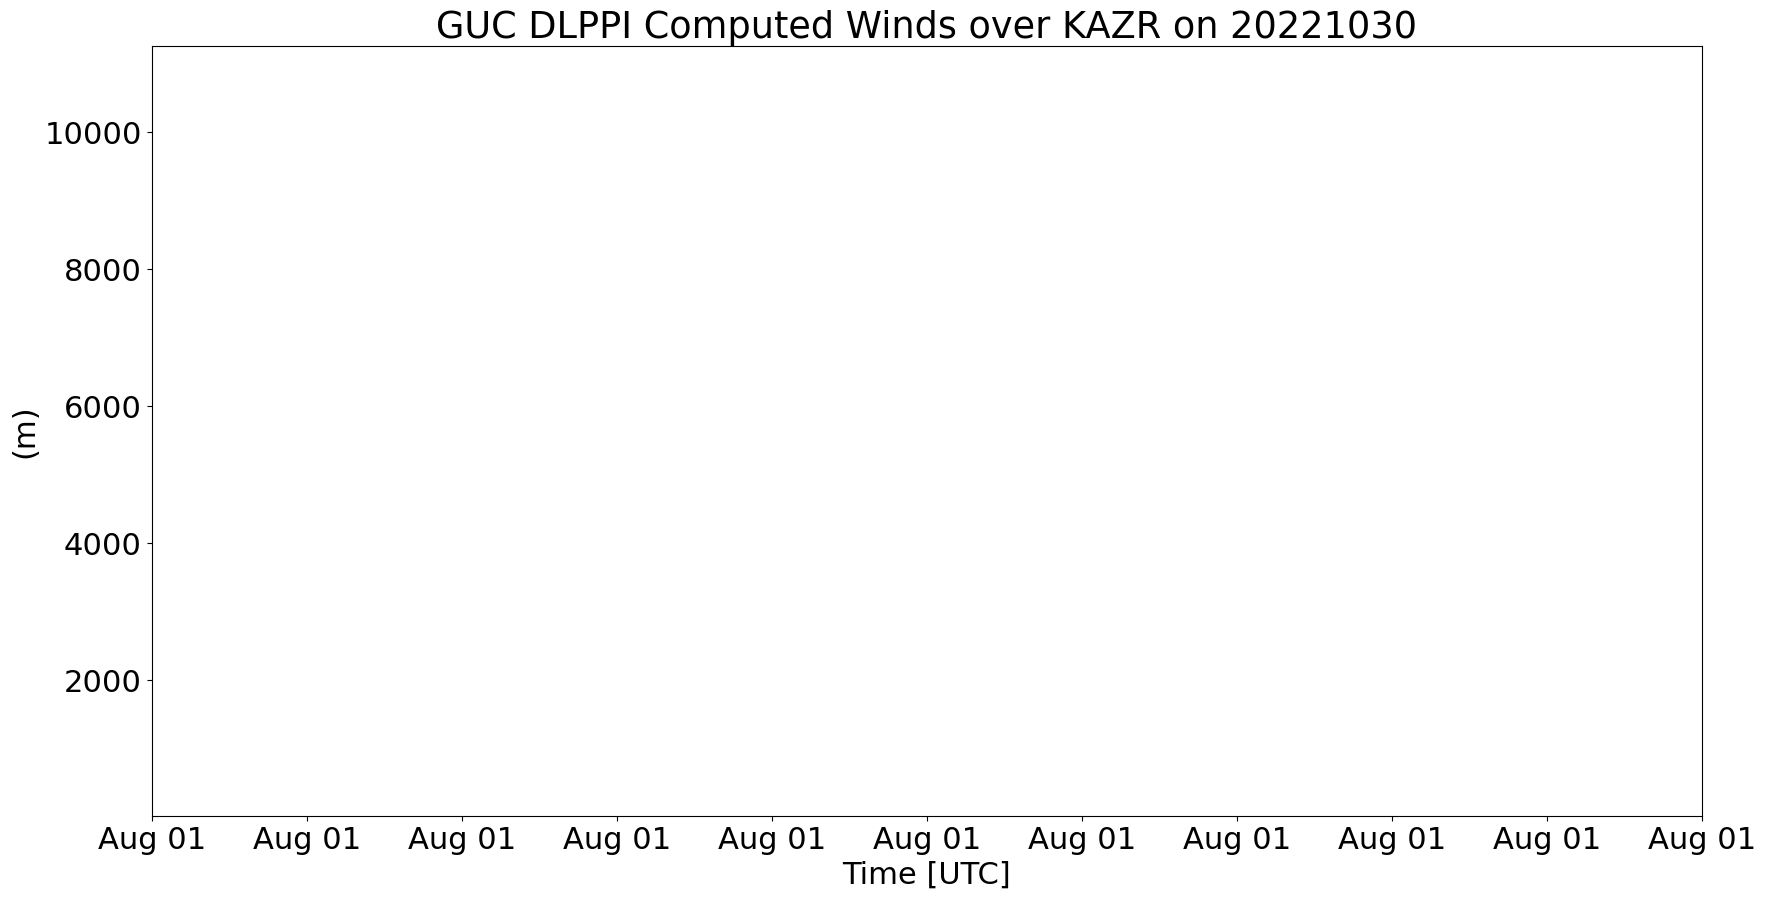

In [43]:
# Create a display object.
display = act.plotting.TimeSeriesDisplay(
    {"GUC DLPPI Computed Winds over KAZR": wind_obj,
     }, figsize=(20, 10))

display.plot_barbs_from_spd_dir('wind_speed', 'wind_direction',
                                dsname='GUC DLPPI Computed Winds over KAZR',
                                invert_y_axis=False)

# Update the x-limits to make sure both wind profiles are shown
display.axes[0].set_xlim([np.datetime64('2022-08-01T22:10'), np.datetime64('2022-08-01T23:50')])
plt.show()

In [44]:
(
    len(ppi_calc_winds_df['time'].unique()), 
    len(ppi_calc_winds_df['height'].unique()), 
),(
    ppi_calc_winds_df['time'].unique(), 
    ppi_calc_winds_df['height'].unique(), 
)

KeyError: 'time'

8 timestamps over ~36 seconds, every ~5 seconds

400 discrete range values

1 elevation angle

8 azimuth directions (259.1, 304.1, 349.1,  34.100006,  79.100006, 124.100006, 169.09998 , 214.09998)

In [45]:
(
    len(df['time'].unique()), 
    len(df['range'].unique()), 
    len(df['elevation'].unique()), 
    len(df['azimuth'].unique())
),(
    df['time'].unique(), 
    df['range'].unique(), 
    df['elevation'].unique(), 
    df['azimuth'].unique()
)

((8, 400, 1, 8),
 (<DatetimeArray>
  ['2022-10-30 00:00:22.240007', '2022-10-30 00:00:27.410003',
   '2022-10-30 00:00:32.529994', '2022-10-30 00:00:37.640014',
   '2022-10-30 00:00:42.770015', '2022-10-30 00:00:47.879997',
   '2022-10-30 00:00:52.999992', '2022-10-30 00:00:58.119983']
  Length: 8, dtype: datetime64[ns],
  array([   15.,    45.,    75.,   105.,   135.,   165.,   195.,   225.,
           255.,   285.,   315.,   345.,   375.,   405.,   435.,   465.,
           495.,   525.,   555.,   585.,   615.,   645.,   675.,   705.,
           735.,   765.,   795.,   825.,   855.,   885.,   915.,   945.,
           975.,  1005.,  1035.,  1065.,  1095.,  1125.,  1155.,  1185.,
          1215.,  1245.,  1275.,  1305.,  1335.,  1365.,  1395.,  1425.,
          1455.,  1485.,  1515.,  1545.,  1575.,  1605.,  1635.,  1665.,
          1695.,  1725.,  1755.,  1785.,  1815.,  1845.,  1875.,  1905.,
          1935.,  1965.,  1995.,  2025.,  2055.,  2085.,  2115.,  2145.,
          2175.,  22

In [46]:
df['azimuth'].unique()

array([259.1     , 304.1     , 349.1     ,  34.100006,  79.100006,
       124.100006, 169.09998 , 214.09998 ], dtype=float32)

# Look at XPrecip radar data, PPI

In [47]:
df2 = xr.open_dataset('/Users/elischwat/Downloads/gucxprecipradarS2.00.20221030.000005.raw.nc/gucxprecipradarS2.00.20221030.000130.raw.csu.sail-20221030-000130_702887_22_1_PPI.nc').to_dataframe()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/elischwat/Downloads/gucxprecipradarS2.00.20221030.000005.raw.nc/gucxprecipradarS2.00.20221030.000130.raw.csu.sail-20221030-000130_702887_22_1_PPI.nc'

from 

https://cookbooks.projectpythia.org/radar-cookbook/notebooks/foundations/pyart-gridding.html

In [ ]:
radar = pyart.io.read('/Users/elischwat/Downloads/gucxprecipradarS2.00.20221030.000005.raw.nc/gucxprecipradarS2.00.20221030.000130.raw.csu.sail-20221030-000130_702887_22_1_PPI.nc')
print(radar.scan_type)

In [ ]:
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.RadarMapDisplay(radar)
radar.fields.keys()

In [ ]:
display.plot_ppi('DBZ')

# Look at XPrecip radar data, RHI

In [ ]:
# Explore files

radar = pyart.io.read('/Users/elischwat/Downloads/gucxprecipradarS2.00.20221030.000005.raw.nc/gucxprecipradarS2.00.20221030.000005.raw.csu.sail-20221030-000005_702875_22_326_RHI.nc')
print(radar.scan_type)

fig = plt.figure(figsize=[10, 10])
display = pyart.graph.RadarMapDisplay(radar)
radar.fields.keys()

In [ ]:
display.plot_rhi('DBZ')